In [219]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.image as img
import pandas as pd

data_pop = pd.read_csv('Japon Pop+prix data traitées.csv',sep=";") #importe le dossier concernant les villes
data_seisme = pd.read_csv('Japan séismes data traitées.csv',sep=";") #importe le dossier concernant les seismes

lat_pop = data_pop["Latitude"][1:48] # Latitude de toutes les préfectures
long_pop = data_pop["Longitude"][1:48] # Longitude de toutes les préfectures
prix = data_pop["Prix"][1:48] # Prix du m² par ville
villes = data_pop["capital"][1:48] # Nom des villes

lat_seisme = data_seisme["latitude"] # Latitude de tous les séismes
long_seisme = data_seisme["longitude"] # Longitude de tous les séismes
magn_seisme = data_seisme["mag"] # Magnétude de tous les séismes

<function matplotlib.pyplot.show(close=None, block=None)>

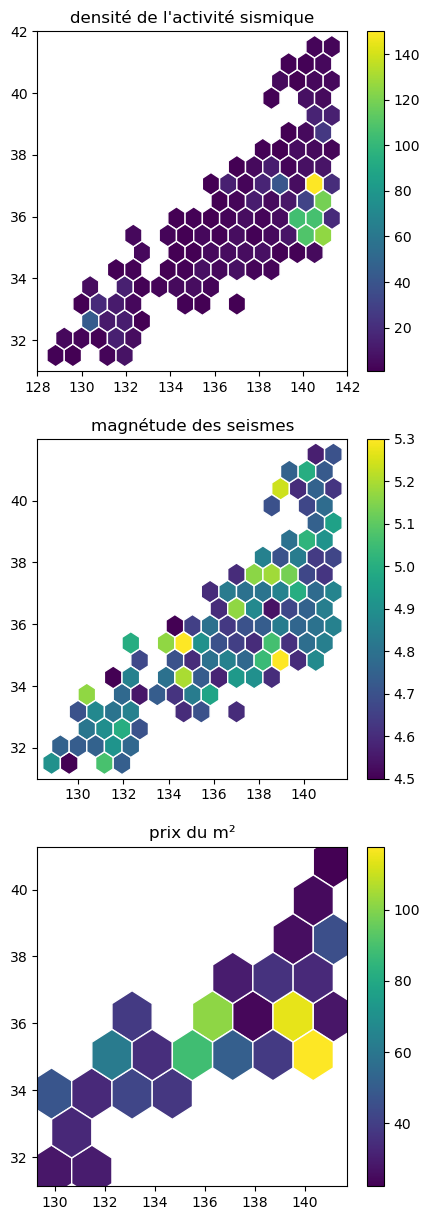

In [220]:
plt.figure(figsize=(5,15))

# On choisit la taille des hexagones pour ne pas avoir de trous
# On choisit la même taille pour la densité et la magnétude pour les superposer dans les fonctions plus bas

plt.subplot(311)
plt.hexbin(long_seisme, lat_seisme,gridsize=16,mincnt=1,color="white")
plt.colorbar()
plt.axis([128,142,31,42])
plt.title("densité de l'activité sismique")

plt.subplot(312)
plt.hexbin(long_seisme, lat_seisme,gridsize=16,mincnt=1,C=magn_seisme,color="white")
plt.colorbar()
plt.title("magnétude des seismes")

plt.subplot(313)
plt.hexbin(long_pop,lat_pop,C=prix,gridsize=7,color="white")
plt.colorbar()
plt.title("prix du m²")
plt.show

In [221]:
# On récupère les coordonnées des centres de chaque exagone
# Les coordonnées étant les mêmes pour densité et magnétude, on utilisera la même liste pour les deux 
# (d'où le choix plus tôt de prendre la même taille d'hexagone)

coord_hexbin_seisme_brutes = plt.hexbin(long_seisme, lat_seisme,gridsize=16).get_offsets()
coord_hexbin_prix_brutes = plt.hexbin(long_seisme, lat_seisme,gridsize=16,C=magn_seisme).get_offsets()

plt.close() #Pour ne pas afficher les graphes

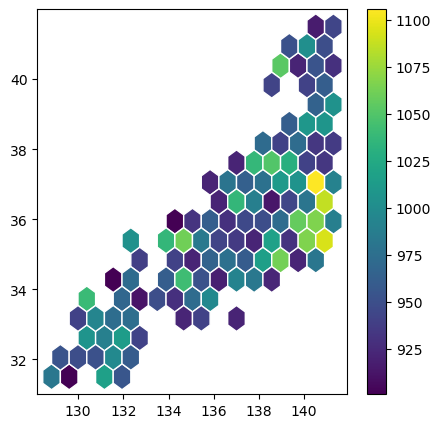

In [240]:
def trie_coord_hexbin(data): 
    # les coordonnées récupérés sont des listes de listes de 2 éléments, on veut récupérer deux listes dinstinctes de int
    Long=[]
    Lat=[]
    for i in data:
        Long.append(i[0])
        Lat.append(i[1])
    return Lat,Long
        
coord_hexbin_seisme_triés = trie_coord_hexbin(coord_hexbin_seisme_brutes)
coord_hexbin_prix_triés = trie_coord_hexbin(coord_hexbin_prix_brutes)

def moyenne_prix_magn(coord_seisme, valeur_magn , valeur_nb , facteur_magn, facteur_nb):
    # On combine les valeurs de densité et de magnétude, on peut décider de l'importance de chaque données via les facteurs
    # Attention: de base les données sont biaisés en faveur de la densité (chiffre beaucoup plus importants que la magnétude)
    L=[]
    for i in range(len(coord_seisme[0])):
        L.append((valeur_nb[i]*facteur_nb)+(valeur_magn[i]*facteur_magn))
    return L

moy_prix_magn = moyenne_prix_magn(coord_hexbin_seisme_tries,values_hexbin_magn, values_hexbin_nb, 200, 1 )

plt.figure(figsize=(5,5))
plt.hexbin(coord_hexbin_seisme_tries[1],coord_hexbin_seisme_tries[0],C=moy_prix_magn,gridsize=16,color="white")
plt.colorbar()

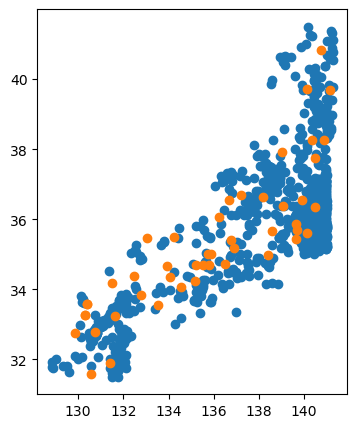

In [223]:
plt.figure(figsize=(4,5))
plt.scatter(long_seisme,lat_seisme)
plt.scatter(long_pop,lat_pop)

In [224]:
# A faire:
# - Continuer d'affiner les datas séismes
# - Faire la fonction  moyenne en prenant aussi en compte le prix (différents tailles et coord, comment faire ?)
# - Prendre en compte la densité de population (pas sur) -> prendre en compte l'évolution de la population ?
# - Mettre une image du Japon en fond pour que l'ont voit bien correspondre les graphes au pays
# - Réduire la taille des hexagones et estimer les trous par la moyenne des cases environnantes